In [2]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Categorical Distribution ##

In [4]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [5]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [61]:
# Table.group?
studio_distribution = studios.group('Studio')

In [62]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [ ]:
# Exercise: Find all the studios with only 1 release, and then
# find the movie they released.
studio_dist

## Bar Charts ##

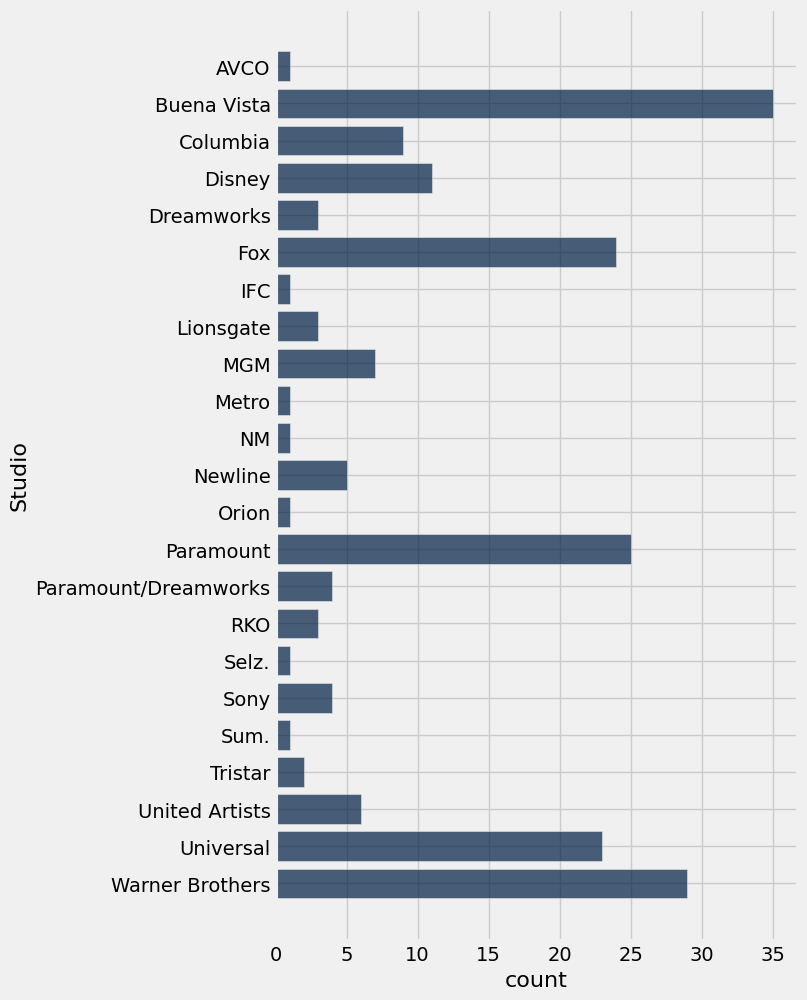

In [10]:
studio_distribution.barh('Studio')

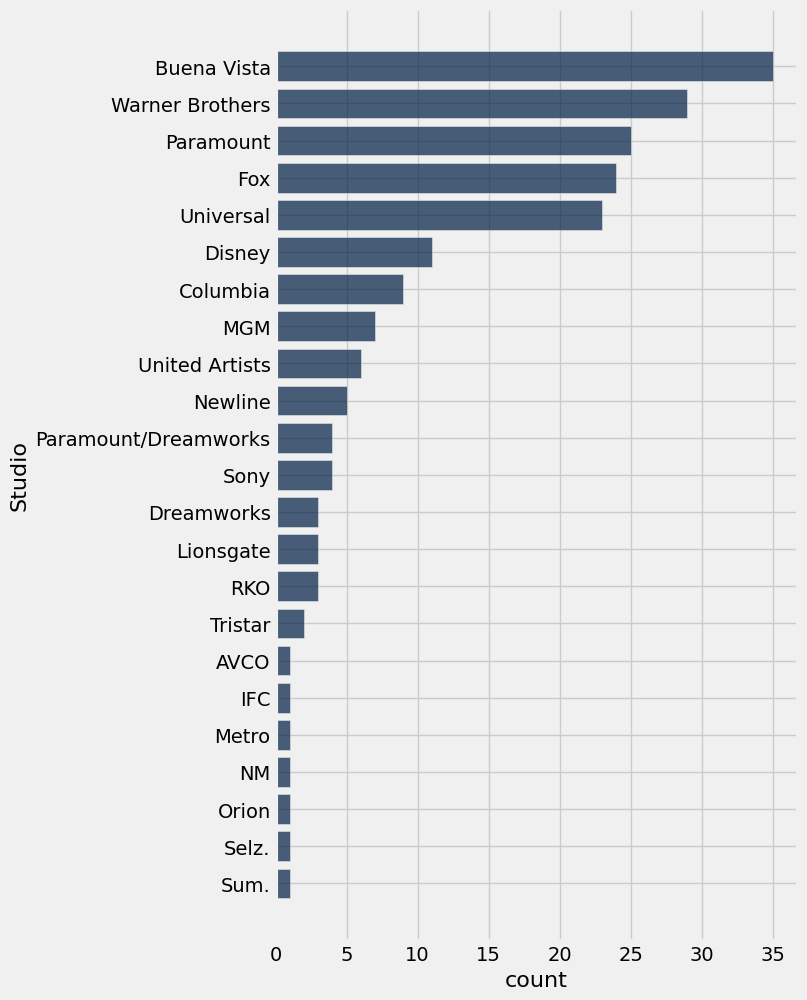

In [11]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [12]:
ages = 2024 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [13]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,85
Star Wars,Fox,460998007,1583483200,1977,47
The Sound of Music,Fox,158671368,1266072700,1965,59
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,42
Titanic,Paramount,658672302,1204368000,1997,27
The Ten Commandments,Paramount,65500000,1164590000,1956,68
Jaws,Universal,260000000,1138620700,1975,49
Doctor Zhivago,MGM,111721910,1103564200,1965,59
The Exorcist,Warner Brothers,232906145,983226600,1973,51
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,87


In [16]:
min(ages), max(ages)
# Exercise: which movie(s) are the oldest?

(7, 103)

In [17]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [18]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,18
10,15
15,42
25,43
40,59
65,22
100,0


In [19]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,75
25,69
50,46
75,9
100,0


## Histograms ##

In [20]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [21]:
binned_data

bin,Age count
0,0
5,18
10,15
15,42
25,43
40,59
65,22
100,0


In [22]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [23]:
binned_data

bin,Age count,Percent
0,0,0
5,18,9
10,15,7.5
15,42,21
25,43,21.5
40,59,29.5
65,22,11
100,0,0


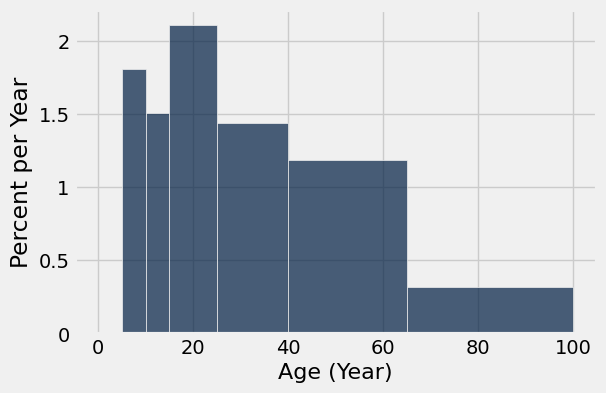

In [24]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

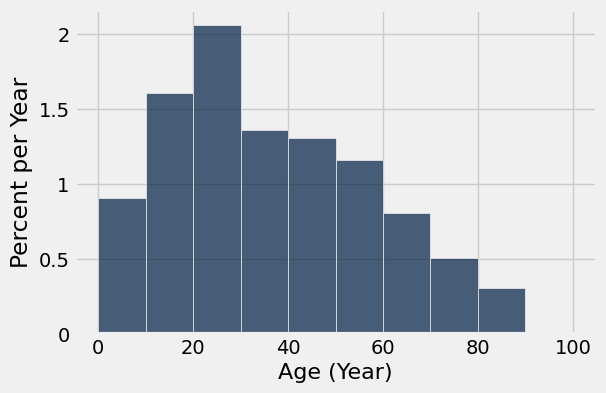

In [25]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

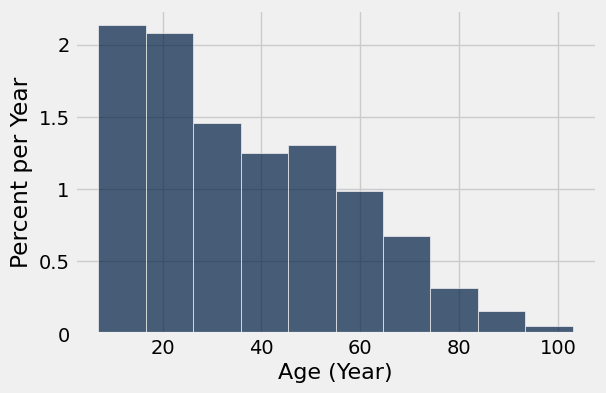

In [26]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

## Height ##

### Question: What is the height of the [40, 65] bin?

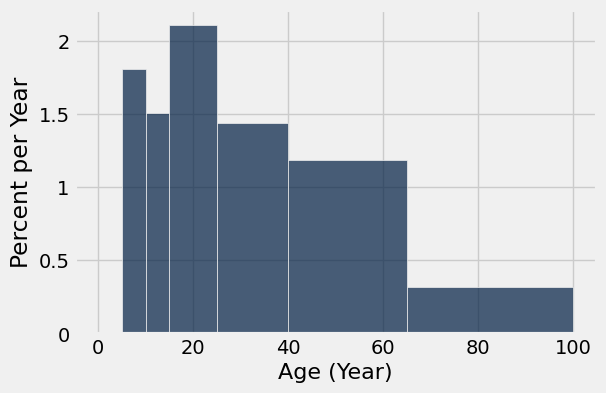

In [27]:
top_movies.hist('Age', bins=my_bins, unit='Year')

In [28]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [29]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [30]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.18

### What are the heights of the rest of the bins?

In [31]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [32]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [33]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [34]:
bin_lefts

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,18,9,5,1.8
10,15,7.5,5,1.5
15,42,21,10,2.1
25,43,21.5,15,1.43333
40,59,29.5,25,1.18
65,22,11,35,0.314286


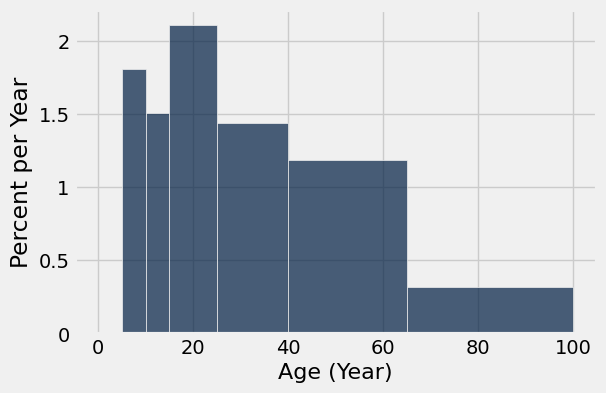

In [45]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [60]:
# Exercise:
# Make a histogram of the top movies.
# Use bins with a width of 5 years and only take movies released from 1980 to 2014.
movie_bins = ...